In [ ]:
# Import libraries 

import pandas as pd
import numpy as np
import scipy as sp 
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Set seaborn plotting defaults
sns.set(context='talk', font_scale=0.9, style='whitegrid', palette='Blues_d')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# For a specific version of seaborn package 
!pip install seaborn==0.10.1

In [ ]:
# Clone GitHub repo

In [ ]:
# change directory 
%cd /content/COVID19/data/processed 

/content/COVID19/data/processed


In [ ]:
 %ls # copy the name of the excel files you'll need 

In [ ]:
# Import Files 
df = pd.read_excel('PADDED_Dataset_2020_08_10_GE50_Deaths.xlsx')
#df7 = pd.read_excel('7DaySmooth_COVStats_Dataset_2020_08_10_GE50_Deaths.xlsx')
df7all = pd.read_excel('7DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.xlsx')


# Drop unnecessary index columns 
# df.drop(columns='Unnamed: 0',axis=1,inplace=True); df3.drop(columns='Unnamed: 0',axis=1,inplace=True); df7.drop(columns='Unnamed: 0',axis=1,inplace=True); df3all.drop(columns='Unnamed: 0',axis=1,inplace=True); 
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
#df7.drop(columns='Unnamed: 0',axis=1,inplace=True)
df7all.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Function for calculating the indoor relative humidity from the "thermal comfort" temperature and absolute humidity 
# Values are calculated using formula and saturation vd best-fit provided by Georgia State's HyperPhysics site
def indoor_rh_calc(T_actual, T_comfort, AbsHum): 
  if T_actual < T_comfort: 
    SatVaporDensity = 5.018 + 0.32321*T_comfort + 8.1847e-3*T_comfort**2 + 3.1243e-4*T_comfort**3 #in g/m3
  else: 
    SatVaporDensity = 5.018 + 0.32321*T_actual + 8.1847e-3*T_actual**2 + 3.1243e-4*T_actual**3 #in g/m3

  ActualVaporDensity = AbsHum #in g/m3
  RelativeHumidity = (ActualVaporDensity/SatVaporDensity)*100
  return RelativeHumidity

In [ ]:
Thermal_Comfort_Temp = 19 # degrees C 
df.loc[:,'IndoorRH_pct_19'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 20 # degrees C 
df.loc[:,'IndoorRH_pct_20'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 21 # degrees C 
df.loc[:,'IndoorRH_pct_21'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 22 # degrees C 
df.loc[:,'IndoorRH_pct_22'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 23 # degrees C 
df.loc[:,'IndoorRH_pct_23'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 24 # degrees C 
df.loc[:,'IndoorRH_pct_24'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 25 # degrees C 
df.loc[:,'IndoorRH_pct_25'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

Thermal_Comfort_Temp = 26 # degrees C 
df.loc[:,'IndoorRH_pct_26'] = [indoor_rh_calc(actualtemp, Thermal_Comfort_Temp, abshum) for actualtemp, abshum in zip(df['DailyTemp_C'], df['DailyAH_gperm3'])]

In [ ]:
%cd /content/COVID19/data
# Import scripts to 1) smooth the dataset (with a rolling mean) and 2) calculate additional COVID outbreak metrics 
from processing import rolling_mean, calculate_more_COV_metrics

/content/COVID19/data


In [ ]:
# Define the columns you'd like to calc rolling average for (newly calculated indoor humidity columns)
indrhsmoothing = ['IndoorRH_pct_19','IndoorRH_pct_20', 'IndoorRH_pct_21', 'IndoorRH_pct_22', 'IndoorRH_pct_23', 'IndoorRH_pct_24', 'IndoorRH_pct_25', 'IndoorRH_pct_26']

# With a 7 day rolling avg 
df_indrh7daysmooth = rolling_mean(df,indrhsmoothing,7)

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa

upper_lat_bound = 23.5; lower_lat_bound = -23.5 

n_hem = df[df['Lat']>upper_lat_bound]
s_hem = df[df['Lat']<lower_lat_bound]
trop  = df[(df['Lat']<upper_lat_bound) & (df['Lat']>lower_lat_bound)]

# print('Total Country Count:',df['Country'].unique().shape[0])
# print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
# print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
# print('Tropics Country Count:',trop['Country'].unique().shape[0])

# Assign the region name to each country in the dataset 
df.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else # assigned n_hem if its in the list of northern hemisphere countries 
                      's_hem' if country_name in s_hem['Country'].unique() else # assigned s_hem if its in the list of southern hemisphere countries 
                      'trop' # assigned tropical if its neigher northern or southern hemisphere 
                      for country_name in df.loc[:,'Country']]

#df7.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7.loc[:,'Country']]
df7all.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7all.loc[:,'Country']]
#downsampled_df.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in downsampled_df.loc[:,'Country']]

In [ ]:
# Add smoothed indoor RH columns to the smoothed dataframe (with COVID-19 statistics) 
merged = pd.merge(df7all, df_indrh7daysmooth[['Country','Days From 5th Death','IndoorRH_pct_19','IndoorRH_pct_20','IndoorRH_pct_21','IndoorRH_pct_22','IndoorRH_pct_23','IndoorRH_pct_24', 'IndoorRH_pct_25','IndoorRH_pct_26']],on=['Country','Days From 5th Death'])

In [ ]:
# Set seaborn plotting style 
sns.set(context='talk', font_scale=0.9, style='ticks', palette='Blues_d')

In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

# # Test run the function 
# make_lags(df,'Days From 5th Death','IndoorRH_pct',28)

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

# # Test run the function 
# COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
#        'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
#        'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
#        'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
#        'new_deaths_per_million_diff', 'new_deaths_pctchange',
#        'new_deaths_per_million_pctchange']

# lagged_var_df(df,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

In [ ]:
# Function for changing seaborn barplot width 

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

In [ ]:
# Make lagged dataframes with each of the differently-calculated indoor RH columns  
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

lagged_19 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_19',28,COVIDstats)
lagged_20 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_20',28,COVIDstats)
lagged_21 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_21',28,COVIDstats)
lagged_22 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_22',28,COVIDstats)
lagged_23 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_23',28,COVIDstats)
lagged_24 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_24',28,COVIDstats)
lagged_25 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_25',28,COVIDstats)
lagged_26 = lagged_var_df(merged,'Days From 5th Death','IndoorRH_pct_26',28,COVIDstats)

In [ ]:
# Discretize the indoor RH treatments 
bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 

lagged_19['quantized_IndRH'] = pd.cut(lagged_19['IndoorRH_pct_19'],bins=bins,labels=labels) 
lagged_19['quantized_IndRH_lag7'] = pd.cut(lagged_19['IndoorRH_pct_19_lag7'],bins=bins,labels=labels)
lagged_19['quantized_IndRH_lag14'] = pd.cut(lagged_19['IndoorRH_pct_19_lag14'],bins=bins,labels=labels)
lagged_19['quantized_IndRH_lag21'] = pd.cut(lagged_19['IndoorRH_pct_19_lag21'],bins=bins,labels=labels) 

lagged_20['quantized_IndRH'] = pd.cut(lagged_20['IndoorRH_pct_20'],bins=bins,labels=labels) 
lagged_20['quantized_IndRH_lag7'] = pd.cut(lagged_20['IndoorRH_pct_20_lag7'],bins=bins,labels=labels)
lagged_20['quantized_IndRH_lag14'] = pd.cut(lagged_20['IndoorRH_pct_20_lag14'],bins=bins,labels=labels)
lagged_20['quantized_IndRH_lag21'] = pd.cut(lagged_20['IndoorRH_pct_20_lag21'],bins=bins,labels=labels) 

lagged_21['quantized_IndRH'] = pd.cut(lagged_21['IndoorRH_pct_21'],bins=bins,labels=labels) 
lagged_21['quantized_IndRH_lag7'] = pd.cut(lagged_21['IndoorRH_pct_21_lag7'],bins=bins,labels=labels)
lagged_21['quantized_IndRH_lag14'] = pd.cut(lagged_21['IndoorRH_pct_21_lag14'],bins=bins,labels=labels)
lagged_21['quantized_IndRH_lag21'] = pd.cut(lagged_21['IndoorRH_pct_21_lag21'],bins=bins,labels=labels) 

lagged_22['quantized_IndRH'] = pd.cut(lagged_22['IndoorRH_pct_22'],bins=bins,labels=labels) 
lagged_22['quantized_IndRH_lag7'] = pd.cut(lagged_22['IndoorRH_pct_22_lag7'],bins=bins,labels=labels)
lagged_22['quantized_IndRH_lag14'] = pd.cut(lagged_22['IndoorRH_pct_22_lag14'],bins=bins,labels=labels)
lagged_22['quantized_IndRH_lag21'] = pd.cut(lagged_22['IndoorRH_pct_22_lag21'],bins=bins,labels=labels) 

lagged_23['quantized_IndRH'] = pd.cut(lagged_23['IndoorRH_pct_23'],bins=bins,labels=labels) 
lagged_23['quantized_IndRH_lag7'] = pd.cut(lagged_23['IndoorRH_pct_23_lag7'],bins=bins,labels=labels)
lagged_23['quantized_IndRH_lag14'] = pd.cut(lagged_23['IndoorRH_pct_23_lag14'],bins=bins,labels=labels)
lagged_23['quantized_IndRH_lag21'] = pd.cut(lagged_23['IndoorRH_pct_23_lag21'],bins=bins,labels=labels) 

lagged_24['quantized_IndRH'] = pd.cut(lagged_24['IndoorRH_pct_24'],bins=bins,labels=labels) 
lagged_24['quantized_IndRH_lag7'] = pd.cut(lagged_24['IndoorRH_pct_24_lag7'],bins=bins,labels=labels)
lagged_24['quantized_IndRH_lag14'] = pd.cut(lagged_24['IndoorRH_pct_24_lag14'],bins=bins,labels=labels)
lagged_24['quantized_IndRH_lag21'] = pd.cut(lagged_24['IndoorRH_pct_24_lag21'],bins=bins,labels=labels) 

lagged_25['quantized_IndRH'] = pd.cut(lagged_25['IndoorRH_pct_25'],bins=bins,labels=labels) 
lagged_25['quantized_IndRH_lag7'] = pd.cut(lagged_25['IndoorRH_pct_25_lag7'],bins=bins,labels=labels)
lagged_25['quantized_IndRH_lag14'] = pd.cut(lagged_25['IndoorRH_pct_25_lag14'],bins=bins,labels=labels)
lagged_25['quantized_IndRH_lag21'] = pd.cut(lagged_25['IndoorRH_pct_25_lag21'],bins=bins,labels=labels) 

lagged_26['quantized_IndRH'] = pd.cut(lagged_26['IndoorRH_pct_26'],bins=bins,labels=labels) 
lagged_26['quantized_IndRH_lag7'] = pd.cut(lagged_26['IndoorRH_pct_26_lag7'],bins=bins,labels=labels)
lagged_26['quantized_IndRH_lag14'] = pd.cut(lagged_26['IndoorRH_pct_26_lag14'],bins=bins,labels=labels)
lagged_26['quantized_IndRH_lag21'] = pd.cut(lagged_26['IndoorRH_pct_26_lag21'],bins=bins,labels=labels) 

In [ ]:
# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) # Turn discretized treatment (with 3 ordinal levels) into binarized treatment (on or off) 

binary_treatment_19 = lagged_19.copy()  
binary_treatment_19.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_19.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)


binary_treatment_20 = lagged_20.copy()  
binary_treatment_20.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_20.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

binary_treatment_21 = lagged_21.copy()  
binary_treatment_21.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_21.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

binary_treatment_22 = lagged_22.copy()  
binary_treatment_22.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_22.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

binary_treatment_23 = lagged_23.copy()  
binary_treatment_23.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_23.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

binary_treatment_24 = lagged_24.copy()  
binary_treatment_24.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_24.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

binary_treatment_25 = lagged_25.copy()  
binary_treatment_25.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_25.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

binary_treatment_26 = lagged_26.copy()  
binary_treatment_26.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment_26.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

In [ ]:
import statsmodels.api as sm

def oddsratio(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,] # Make a 2x2 contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 
  #print(contig_table)

  table = sm.stats.Table2x2(np.asarray(contig_table)) # Use statsmodels to turn the contingency table into a special 2x2 table for further statsmodels calculations 
  #print(table)

  #table=sm.stats.Table2x2.from_data(data) # Make a contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 

  odds_badoutcome_notreatment = contig_table.iloc[0,0]/contig_table.iloc[1,0] # Odds of having a worse outcome (e.g. more deaths) WITHOUT treatment (e.g. RH<40% or RH>60%) 
  odds_badoutcome_withtreatment = contig_table.iloc[0,1]/contig_table.iloc[1,1] # Odds of having a worse outcome (e.g. more deaths) WITH treatment (e.g. RH 40%-60%) 

  odds_ratio = table.oddsratio # Odds ratio (ratio of odds_badoutcome_notreatment to odds_badoutcome_withtreatment) -> how much more likely are you to have a bad outcome if you don't receive the treatment 
  LCB = table.oddsratio_confint()[0] # Lower 95% confidence boundary
  UCB = table.oddsratio_confint()[1] # Upper 95% confidence boundary 
  pval = table.oddsratio_pvalue() # p-value for a hypothesis test about the odds ratio

  return odds_badoutcome_notreatment, odds_badoutcome_withtreatment, odds_ratio, LCB, UCB, pval 

# To run function... 
# oddsratio(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

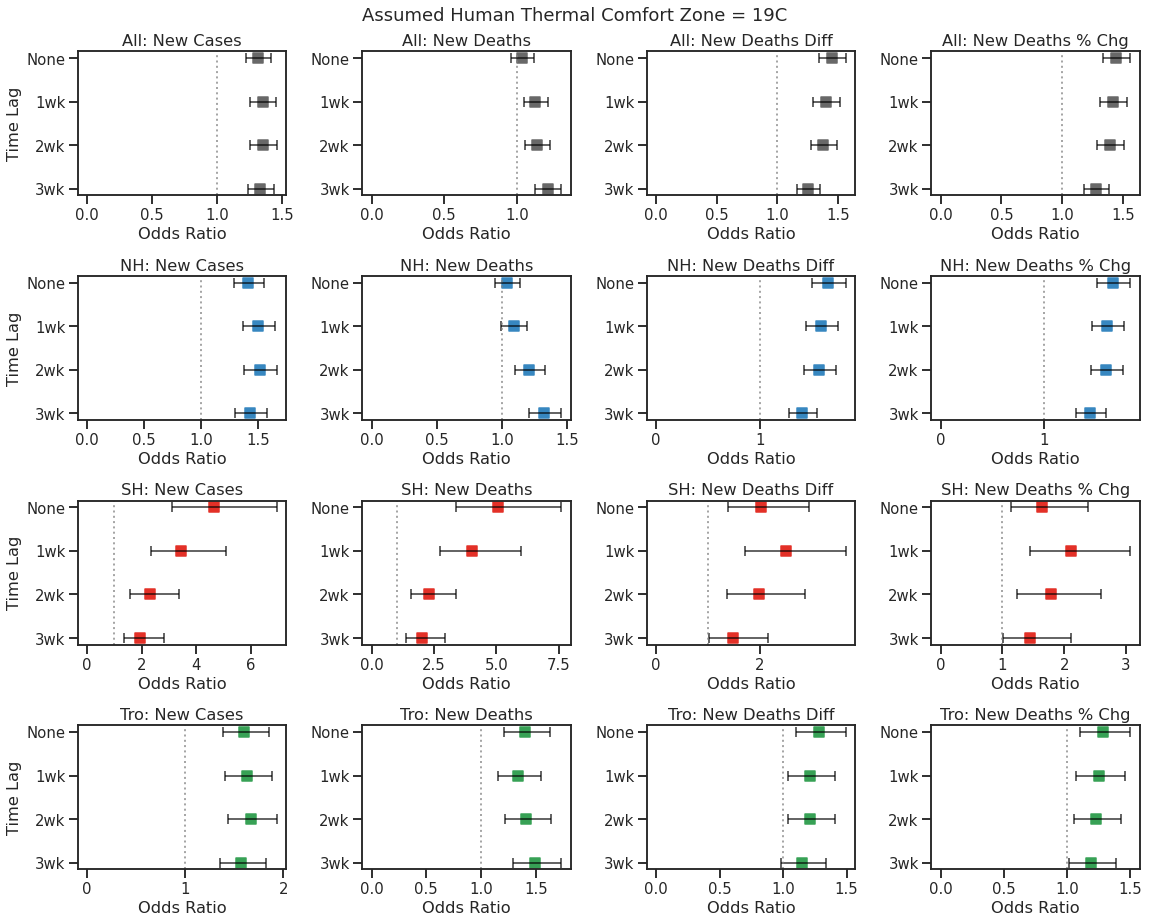

In [ ]:
dataset = binary_treatment_19
T = 19

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

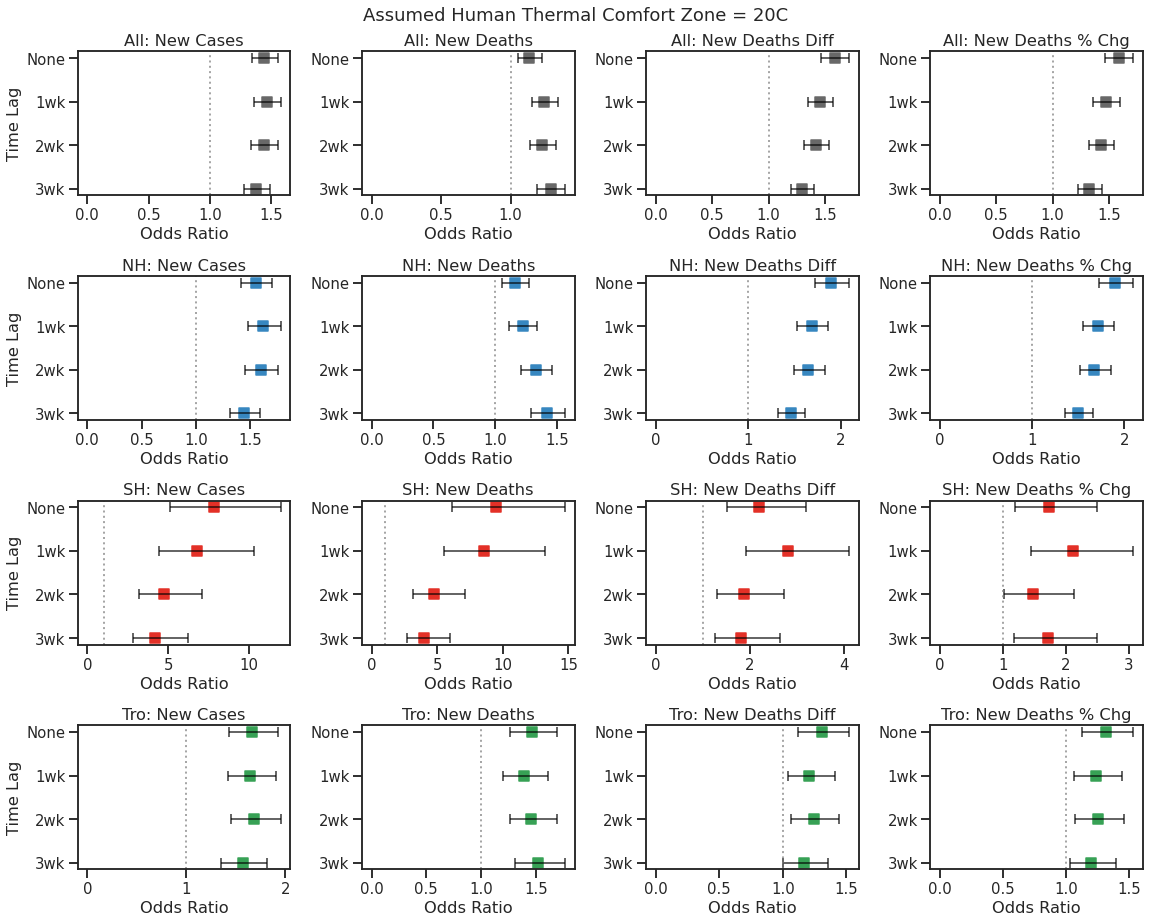

In [ ]:
dataset = binary_treatment_20
T = 20 

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

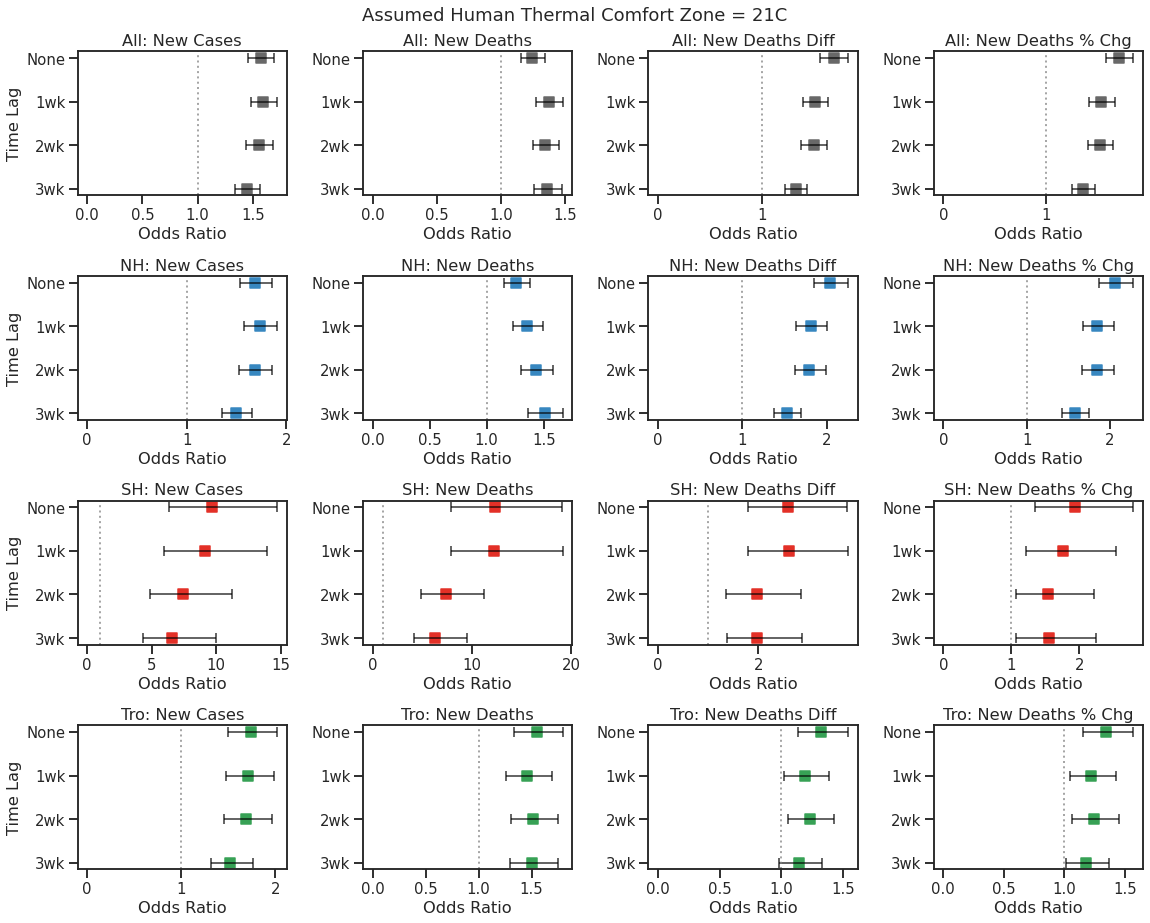

In [ ]:
dataset = binary_treatment_21
T = 21

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

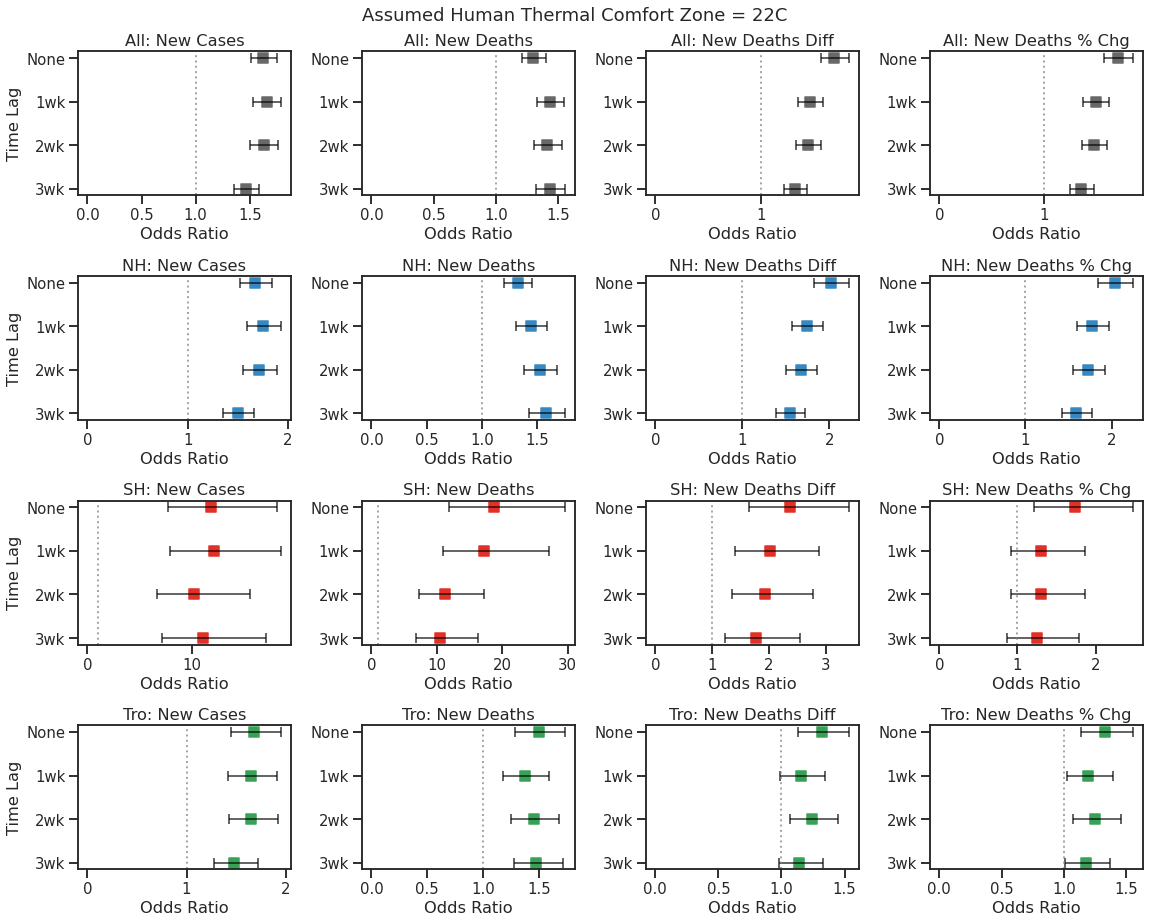

In [ ]:
dataset = binary_treatment_22
T = 22

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

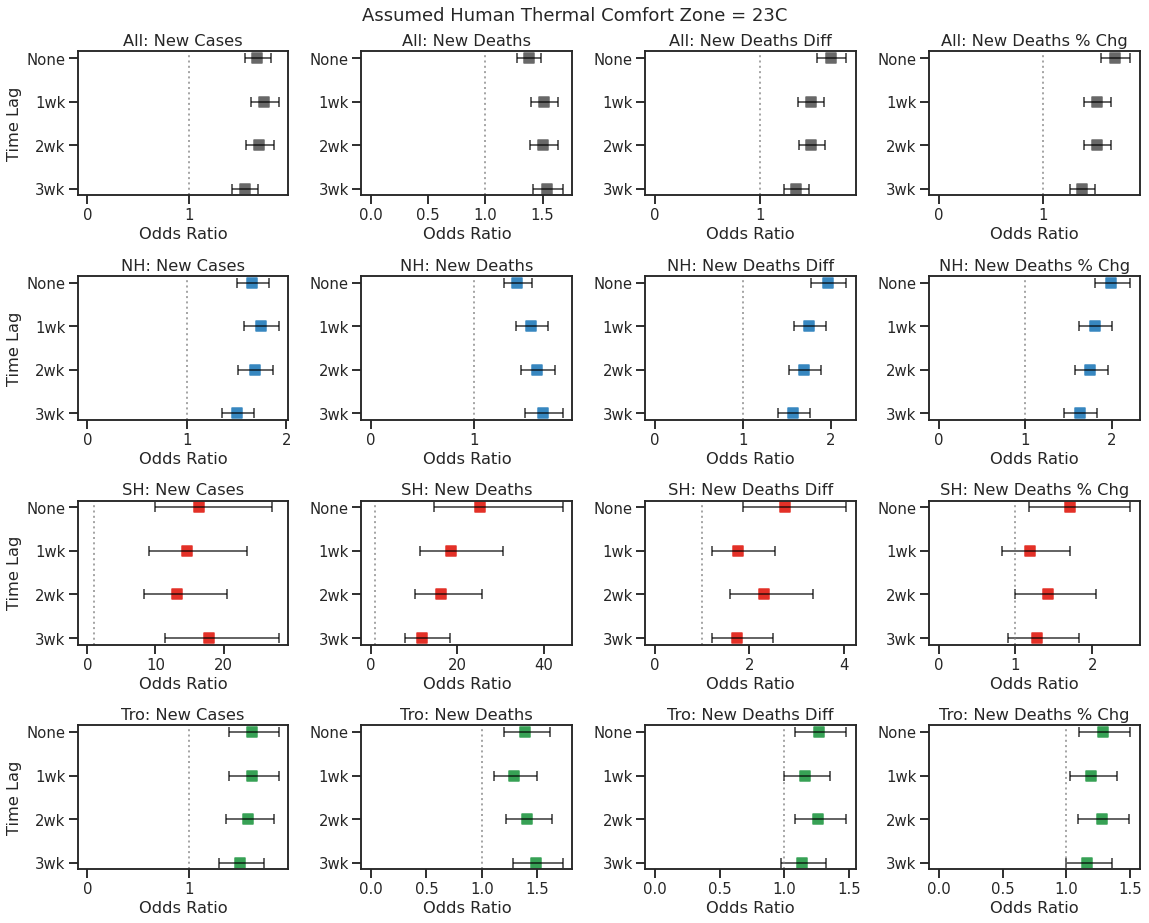

In [ ]:
dataset = binary_treatment_23
T = 23

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

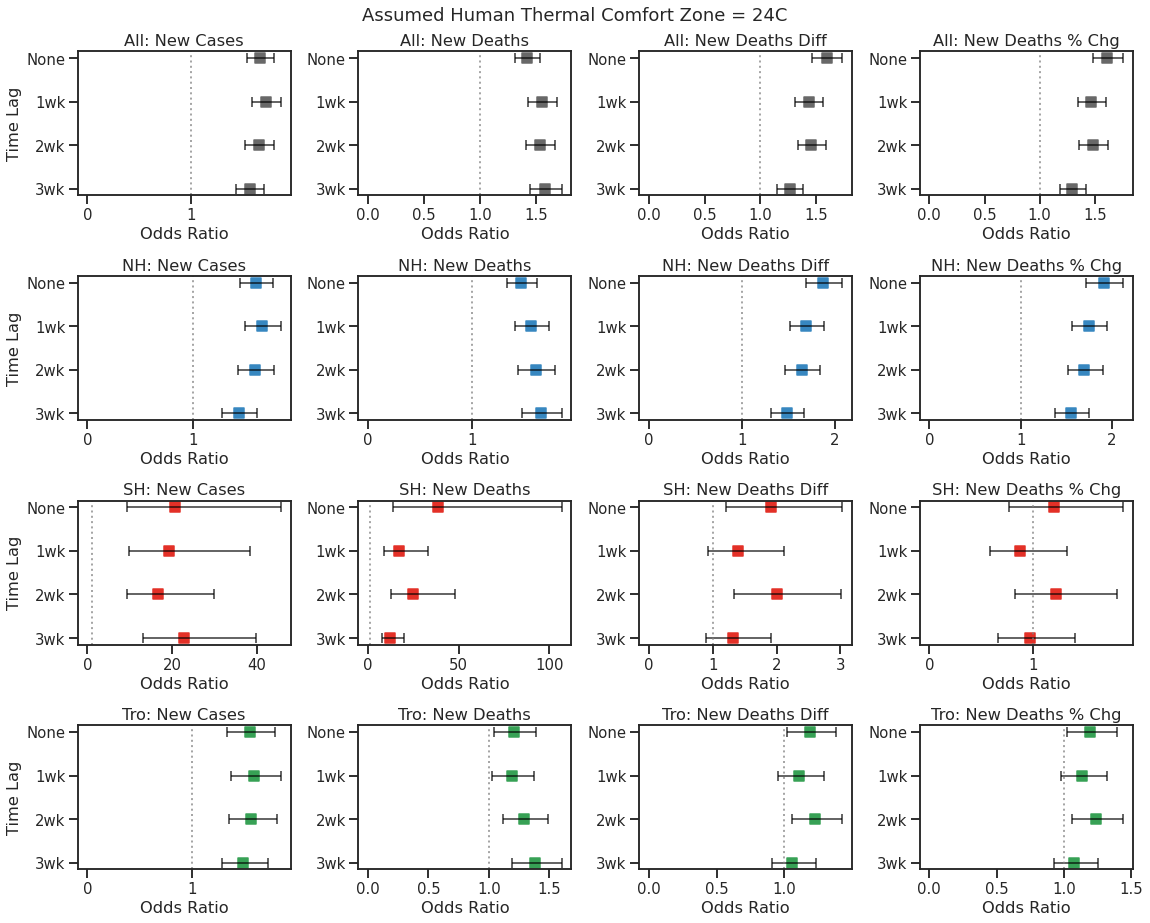

In [ ]:
dataset = binary_treatment_24
T = 24

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

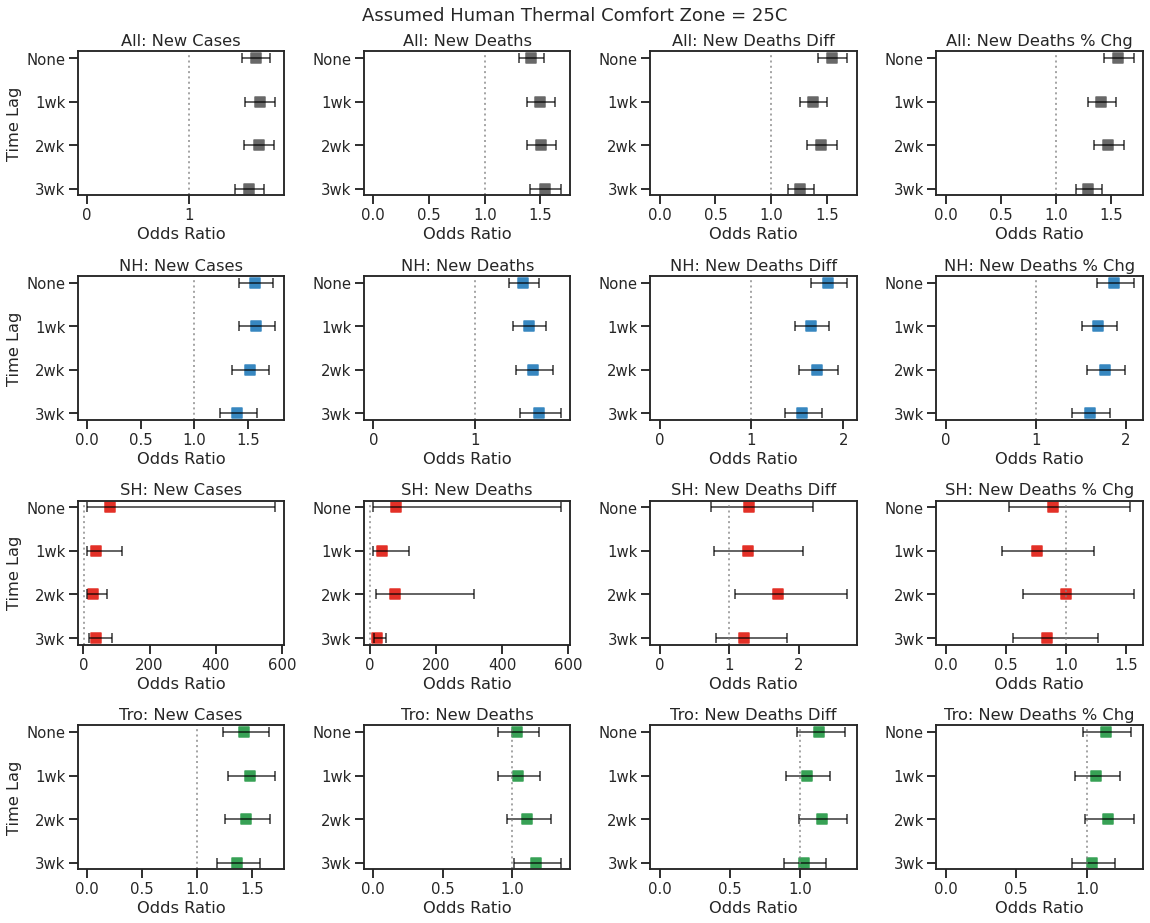

In [ ]:
dataset = binary_treatment_25
T = 25

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

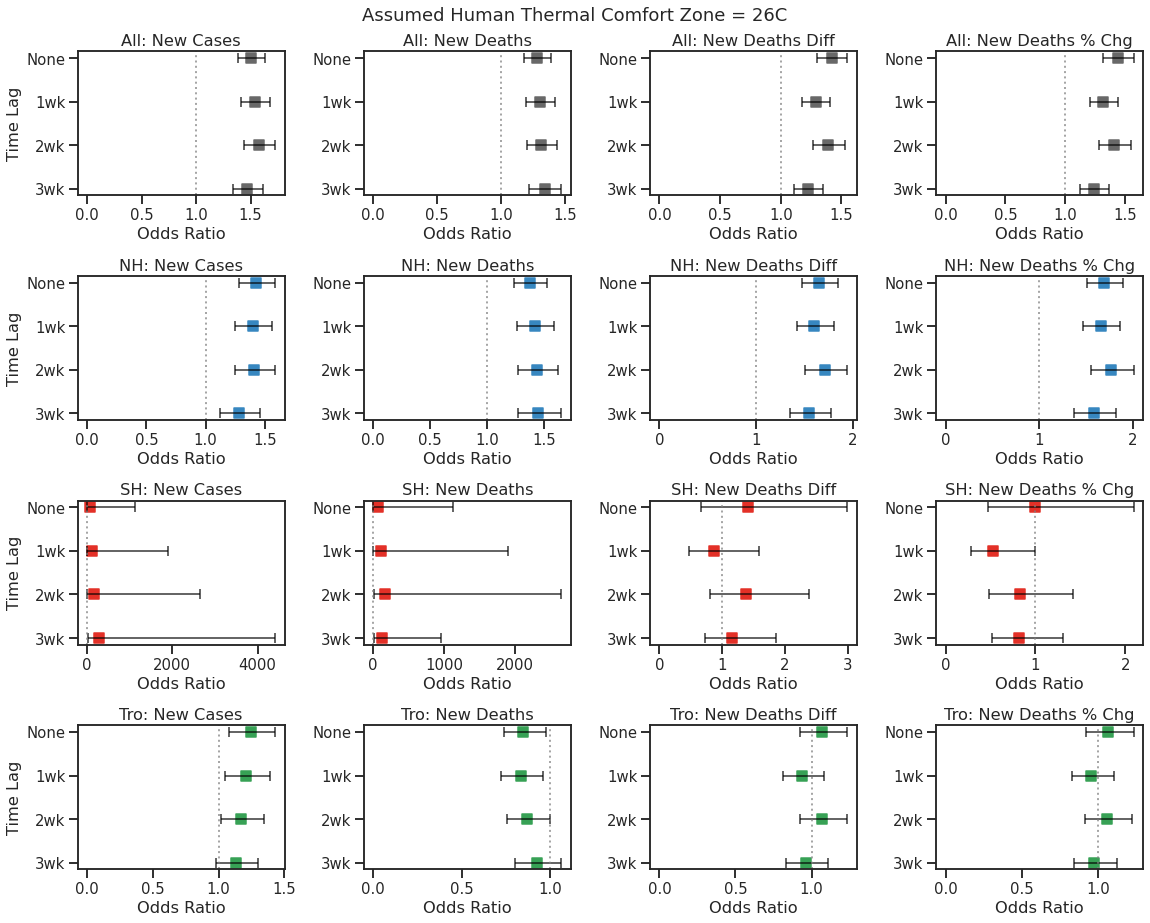

In [ ]:
dataset = binary_treatment_26
T = 26

# Compute odds ratios by region (All Countries, NH, SH, Trop) 
first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_nhem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=n_hem['Country'].unique(), retbins=False).dropna()
treat_shem = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=s_hem['Country'].unique(), retbins=False).dropna()
treat_trop = quantizer(dataframe=dataset, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=trop['Country'].unique(), retbins=False).dropna()

quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_list = [treat_total, treat_nhem, treat_shem, treat_trop]
dataset_names = ['All','NH','SH','Tro']

level3 = []
for outcome in quantized_outcomes: 
  level2 = []
  for humidity in quantized_humidities: 
    level1 = [] # Empty list to store each output from the primary calculations
    for dset in dataset_list: 
      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval
      level1.append(computeOR) # Append the output tuple to the list 
    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe
    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 
  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 
df_ORs_byregion = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 
print('Done')

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','NH','SH','Tro']

rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,13))
points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_byregion.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].errorbar(x=data_for_plotting['odds_ratio'],y=lag,xerr=np.array([data_for_plotting['odds_ratio']-data_for_plotting['LCL'],data_for_plotting['UCL']-data_for_plotting['odds_ratio']]).reshape(-1,1),capsize=5,capthick=2,elinewidth=2,ecolor='k',alpha=0.6,dash_capstyle='butt')
      points.append(ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=1,s=120))
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

ax[0,0].set_title('All: New Cases'); ax[1,0].set_title('NH: New Cases'); ax[2,0].set_title('SH: New Cases'); ax[3,0].set_title('Tro: New Cases')
ax[0,1].set_title('All: New Deaths'); ax[1,1].set_title('NH: New Deaths'); ax[2,1].set_title('SH: New Deaths'); ax[3,1].set_title('Tro: New Deaths')
ax[0,2].set_title('All: New Deaths Diff'); ax[1,2].set_title('NH: New Deaths Diff'); ax[2,2].set_title('SH: New Deaths Diff'); ax[3,2].set_title('Tro: New Deaths Diff')
ax[0,3].set_title('All: New Deaths % Chg'); ax[1,3].set_title('NH: New Deaths % Chg'); ax[2,3].set_title('SH: New Deaths % Chg'); ax[3,3].set_title('Tro: New Deaths % Chg')

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]; [ax[r,0].set_ylabel('Time Lag') for r in np.arange(0,4)]

[points[i].set_color(sns.color_palette(palette='Greys_d',n_colors=1)) for i in range(0,64,4)]
[points[i].set_color(sns.color_palette(palette='Blues_d',n_colors=1)) for i in range(1,65,4)]
[points[i].set_color(sns.color_palette(palette='Reds_d',n_colors=1)) for i in range(2,66,4)]
[points[i].set_color(sns.color_palette(palette='Greens_d',n_colors=1)) for i in range(3,67,4)]

[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.7,linewidth=2) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.suptitle(('Assumed Human Thermal Comfort Zone = {t}C').format(t=T), fontsize=18)
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1,rect=[0, 0, 1, 0.96])

from google.colab import files
filename = ('Supplemental_SensitivityAnalysis_OddsRatios_ChangeAssumedComfortTemp_{t}C.png').format(t=T)
fig.savefig(filename, dpi=500)
files.download(filename) 